# Cobweb plots

The <code>cobweb</code> function below is a slight motification of https://wiki.sagemath.org/interact/dynsys, which was created by Marshall Hampton.

In [1]:
def cobweb(a_function, start, mask = 0, iterations = 20, xmin = 0, xmax = 1):
    % See https://wiki.sagemath.org/interact/dynsys
    '''
    Returns a graphics object of a plot of the function and a cobweb trajectory starting from the value start.

    INPUT:
        a_function: a function of one variable
        start: the starting value of the iteration
        mask: (optional) the number of initial iterates to ignore
        iterations: (optional) the number of iterations to draw, following the masked iterations
        xmin: (optional) the lower end of the plotted interval
        xmax: (optional) the upper end of the plotted interval
    
    EXAMPLES:
        sage: f = lambda x: 3.9*x*(1-x)
        sage: show(cobweb(f,.01,iterations=200), xmin = 0, xmax = 1, ymin=0)
    
    '''
    basic_plot = plot(a_function, xmin = xmin, xmax = xmax)
    id_plot = plot(lambda x: x, xmin = xmin, xmax = xmax)
    iter_list = []
    current = start
    for i in range(mask):
        current = a_function(current)
    iter_list.append([current,current])
    for i in range(iterations):
        iter_list.append([current,a_function(current)])
        current = a_function(current)
        iter_list.append([current,current])
    cobweb = line(iter_list, rgbcolor = (1,0,0))
    return basic_plot + id_plot + cobweb

In [2]:
# This is how you create the function x mapsto 2*x*(1-x)
f = lambda x: 2*x*(1-x)

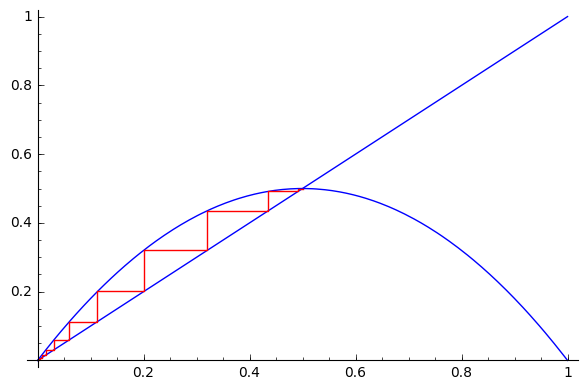

In [6]:
# Create a cobweb plot for orbits of f starting at 0.001. We plot the first 30 iterations.
# The parameters min and max present the minimal and maximal x-coordinates you can view.
cobweb(f, 0.001, iterations=20, xmin=0, xmax=1)

The parameter <code>mask</code> allows you to skip plotting the first steps. This is useful for finding attracting periodic orbits.

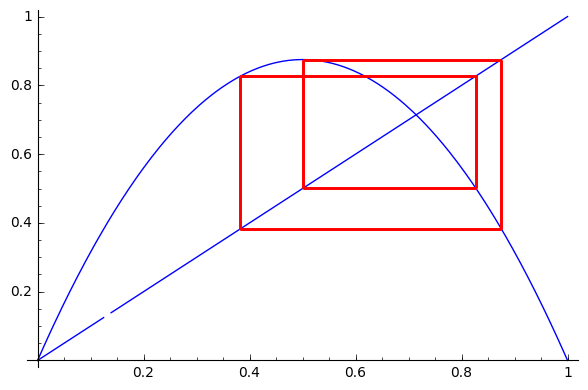

In [7]:
f = lambda x: 3.5*x*(1-x)
x0=0.1
cobweb(f, x0, iterations=20, mask=100, xmin=0, xmax=1) # Plot only the f^100(x0),...,f^119(x_0)

# Interactive cobweb plots.

In [8]:
# This loads some things necessary for interactive plots
from ipywidgets import widgets, interact

Here is how to create an interactive slider which determines a value between 0 and 4.

In [9]:
widgets.FloatSlider(value=1.0, min=0.0, max=4.0, step=0.01, description="c")

The following is a trick to give you a wider slider (and hence better control over the value). I learned this from http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Styling.html

In [10]:
from ipywidgets import Layout

In [11]:
widgets.FloatSlider(value=1.0, min=0.0, max=4.0, step=0.001, description="c", layout=Layout(width='100%'))

In [12]:
@interact(c=widgets.FloatSlider(value=1.0, min=0.0, max=4.0, step=0.001, layout=Layout(width='100%'))) # min value of c=0.0, max value=4.0, step size=0.01.
def what_to_do(c):
    print "We set c="+str(c)

We set c=1.0


Here we add an initial point:

In [13]:
@interact(c=widgets.FloatSlider(value=1.0, min=0.0, max=4.0, step=0.001,layout=Layout(width='100%')),
          x0=widgets.FloatSlider(value=0.5, min=0.0, max=1.0, step=0.001,layout=Layout(width='100%')))
def what_to_do(c,x0):
    print "c="+str(c)+" and x0="+str(x0)

c=1.0 and x0=0.5


Now we add the cobweb plot:

c=1.0 and x0=0.5
Considering the function x mapsto 1.0*x*(1-x).


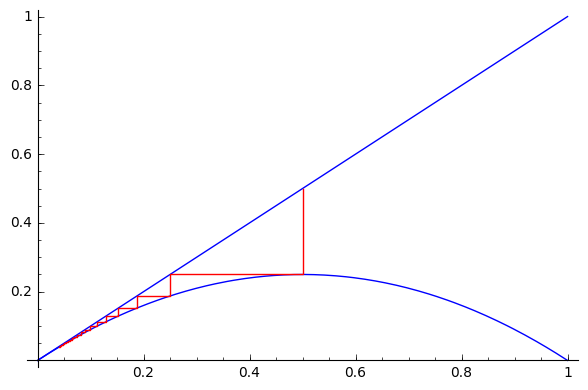

In [14]:
# Added continuous_update=False below. Otherwise the picture updates are unpleasant.
@interact(c=widgets.FloatSlider(value=1.0, min=0.0, max=4.0, step=0.001,layout=Layout(width='100%'),continuous_update=False),
          x0=widgets.FloatSlider(value=0.5, min=0.0, max=1.0, step=0.001,layout=Layout(width='100%'),continuous_update=False))
def what_to_do(c,x0):
    print "c="+str(c)+" and x0="+str(x0)
    print "Considering the function x mapsto "+str(c)+"*x*(1-x)."
    return cobweb(lambda x: c*x*(1-x), x0, iterations=20, xmin=0, xmax=1)

This allows you to select an interval. We'll do this to allow us to select the number of iterations and to select at which iterate to start plotting.

In [15]:
widgets.IntRangeSlider(value=(0,20),min=0,max=1000,layout=Layout(width='100%'))

This version lets you set the number of iterations to do and the delay befor we start plotting.

Considering the function x mapsto 3.569*x*(1-x).
Plotting part of the orbit of x0=0.048, namely T^425(x0) through T


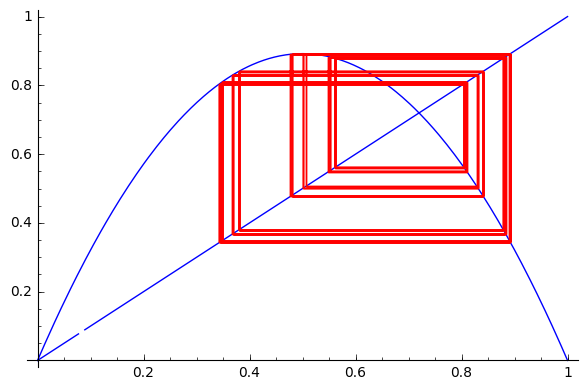

In [16]:
# Added continuous_update=False below. Otherwise the picture updates are unpleasant.
@interact(c=widgets.FloatSlider(value=3.0, min=3.0, max=4.0, step=0.001,continuous_update=False,layout=Layout(width='100%')),
          x0=widgets.FloatSlider(value=0.5, min=0.0, max=1.0, step=0.001,continuous_update=False,layout=Layout(width='100%')),
          it = widgets.IntRangeSlider(value=(0,20),min=0,max=1000, description="mask-iterations", continuous_update=False,layout=Layout(width='100%')))
def what_to_do(c,x0,it):
    print "Considering the function x mapsto "+str(c)+"*x*(1-x)."
    print "Plotting part of the orbit of x0="+str(x0)+", namely T^"+str(it[0])+"(x0) through T"
    return cobweb(lambda x: c*x*(1-x), x0, iterations=it[1]-it[0], mask=it[0], xmin=0, xmax=1)